Following augmentation techniques needs to be performed on all the images in your training dataset: Rotation Range (-30,30) Brightness (Increasing the brightness of the images once) Brightness (Decreasing the brightness of the images once) Flipping the images Sharpening

In [50]:
import os
import cv2
import pandas as pd
import numpy as np
from os import listdir
import glob
import matplotlib.pyplot as plt

In [51]:
os.chdir('F:/Data_Trained/Flip robo/flipkart/Augmented')

In [52]:
# Sharpening
kernel_sharpening=np.array([[-1,-1,-1],
                           [-1,9,-1],
                           [-1,-1,-1]])

In [54]:
data=[]
data1=[]

In [55]:
image_dir=('F:/Data_Trained/Flip robo/flipkart/Augmented/Jeans') # Enter Directory of all images 
data_path = os.path.join(image_dir,'*g')
files = glob.glob(data_path)
for f1 in files:
    img = cv2.imread(f1)
    height,width=img.shape[:2]
    rotation_matrix=cv2.getRotationMatrix2D((width/2,height/2),25,0.6)
    rotation_matrix1=cv2.getRotationMatrix2D((width/2,height/2),-20,0.6)
    M=np.ones(img.shape,dtype="uint8")*75
    rotated_image=cv2.warpAffine(img,rotation_matrix,(width,height))
    data.append(rotated_image)
    rotated_image1=cv2.warpAffine(img,rotation_matrix1,(width,height))
    data.append(rotated_image1)
    added=cv2.add(img,M)
    data.append(added)
    subtracted=cv2.subtract(img,M)
    data.append(subtracted)
    sharpened=cv2.filter2D(img,-1,kernel_sharpening)
    data.append(sharpened)
    flipped=cv2.flip(img,0)
    data.append(flipped)
    height,width=0,0
    M=0
    

In [56]:
len(data)

480

In [57]:
num=0
for image in data:
    cv2.imwrite(str(num)+".jpeg",image)
    num=num+1

In [58]:
image_dir=('F:/Data_Trained/Flip robo/flipkart/Augmented/Trouser') # Enter Directory of all images 
data_path = os.path.join(image_dir,'*g')
files = glob.glob(data_path)
data1 = []
for f1 in files:
    img = cv2.imread(f1)
    height,width=img.shape[:2]
    rotation_matrix=cv2.getRotationMatrix2D((width/2,height/2),25,0.6)
    rotation_matrix1=cv2.getRotationMatrix2D((width/2,height/2),-20,0.6)
    M=np.ones(img.shape,dtype="uint8")*75
    rotated_image=cv2.warpAffine(img,rotation_matrix,(width,height))
    data1.append(rotated_image)
    rotated_image1=cv2.warpAffine(img,rotation_matrix1,(width,height))
    data1.append(rotated_image1)
    added=cv2.add(img,M)
    data1.append(added)
    subtracted=cv2.subtract(img,M)
    data1.append(subtracted)
    sharpened=cv2.filter2D(img,-1,kernel_sharpening)
    data1.append(sharpened)
    flipped=cv2.flip(img,0)
    data1.append(flipped)
    height,width=0,0
    M=0

In [59]:
len(data1)

480

In [60]:
num=0
for image in data1:
    cv2.imwrite(str(num)+".jpeg",image)
    num=num+1

In [61]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation,Dropout,Flatten,Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D,ZeroPadding2D
from keras import optimizers
import scipy
import pylab as pl
import matplotlib.cm as cm
%matplotlib inline

C:\anaconda\envs\py36_test\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\anaconda\envs\py36_test\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\anaconda\envs\py36_test\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\anaconda\envs\py36_test\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarnin

In [62]:
input_shape=(150,150,3)
input_width=150
input_height=150

In [64]:
nb_train_samples=480
nb_validation_samples=44
batch_size=20
epochs=5

In [65]:
train_data_dir='F:/Data_Trained/Flip robo/flipkart/Train_augmnt'

In [66]:
test_data_dir='F:/Data_Trained/Flip robo/flipkart/Test'

In [67]:
# rescale the pixel values from [0,255] to [0,1] interval
datagen=ImageDataGenerator(rescale=1./255)

In [68]:
# retreive images and their classes for train and validation sets
train_generator=datagen.flow_from_directory(
                         train_data_dir,target_size=(input_width,input_height),
                          batch_size=10,class_mode='binary')

Found 960 images belonging to 2 classes.


In [69]:
validation_generator=datagen.flow_from_directory(
                         test_data_dir,target_size=(input_width,input_height),
                          batch_size=10,class_mode='binary')

Found 40 images belonging to 2 classes.


In [70]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
print(model.summary())


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)      

In [71]:
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [72]:
history=model.fit_generator(train_generator,steps_per_epoch=nb_train_samples//batch_size,
                           epochs=10,validation_data=validation_generator,
                           validation_steps=nb_validation_samples//batch_size)


Epoch 1/10
24/24 [==============================] - 24s 983ms/step - loss: 0.9596 - accuracy: 0.4833 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 2/10
24/24 [==============================] - 20s 836ms/step - loss: 0.7062 - accuracy: 0.5042 - val_loss: 0.6925 - val_accuracy: 0.5500
Epoch 3/10
24/24 [==============================] - 19s 782ms/step - loss: 0.7050 - accuracy: 0.5500 - val_loss: 0.6931 - val_accuracy: 0.6500
Epoch 4/10
24/24 [==============================] - 19s 779ms/step - loss: 0.6989 - accuracy: 0.4833 - val_loss: 0.6914 - val_accuracy: 0.4000
Epoch 5/10
24/24 [==============================] - 19s 775ms/step - loss: 0.6979 - accuracy: 0.4958 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 6/10
24/24 [==============================] - 18s 749ms/step - loss: 0.6925 - accuracy: 0.5667 - val_loss: 0.6923 - val_accuracy: 0.5000
Epoch 7/10
24/24 [==============================] - 18s 745ms/step - loss: 0.6971 - accuracy: 0.5208 - val_loss: 0.6945 - val_accuracy: 0.500

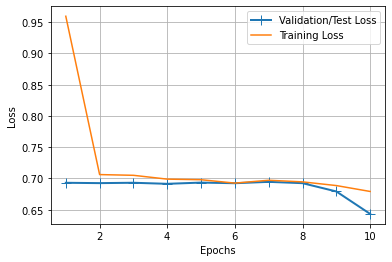

In [73]:
# Plotting our loss charts
import matplotlib.pyplot as plt
history_dict=history.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs=range(1,len(loss_values)+1)
line1=plt.plot(epochs,val_loss_values,label='Validation/Test Loss')
line2=plt.plot(epochs,loss_values,label='Training Loss')
plt.setp(line1,linewidth=2.0,marker='+',markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

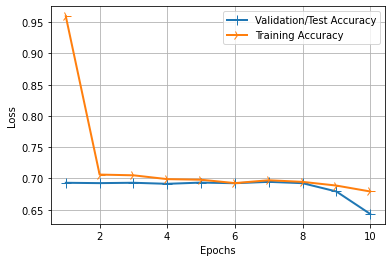

In [74]:
# Plotting accuracy Charts
history_dict=history.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs=range(1,len(loss_values)+1)
line1=plt.plot(epochs,val_loss_values,label='Validation/Test Accuracy')
line2=plt.plot(epochs,loss_values,label='Training Accuracy')
plt.setp(line1,linewidth=2.0,marker='+',markersize=10.0)
plt.setp(line2,linewidth=2.0,marker='4',markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

In [75]:
model.save('jeans_Trouser_with_aug')